> # <b>*세미프로젝트*<b> 

> ## <span style = 'font-size:40px'> <b>1. 분석개요<b> </span>

### 1) 분석의 배경 및 목적 


#### 주제선정 이유 : 
배경 > 관광산업이 주인 `제주도`에는 숙박, 관광, 식당 등 관광객이 선택할 수 있는 폭이 넓다. <br>
정보의 홍수 속 관광객들은 어떤 기준으로 소비를 하는 것일까 궁금증을 갖게 되었다. <br>

의문점 > 
2019년 한 조사에 따르면, 제주도 숙소를 선택하는 기준에 대해 `합리적인 가격`에 약 40%가 응답했다. <br>
합리적인 가격 외에 숙소를 선택하는 기준은 무엇이 있을까? <br>
제주도 숙박업의 (만족도)평점에 외부적인 요인이 개입하였는가?
제주도 헹정지역별 숙박업의 분포는 어떠한가?

![img](./설문조사.jpg) <br>
[출처 : 데일리한국]

#### 알고자 하는 내용: 
- 호텔의 평점(=소비자의 만족도)에 외부적인 요인은 개입을 하였는가? <br>
우리는  <Br>
*(1) 제주공항과의 거리*   
*(2) 동일 행정지역 내의 관광지*  
*(3) 동일 행정지역 내의 음식점*
- 위 3가지 외부요인을 중심으로 말하고자 한다.    

### 2) 분석 범위

#### 분석의 대상 : 숙박업 평점

| <b>외부요인<B> | <b>데이터 소스<b> |
|------------|----------------|
|`공항과의 거리`       | 제주공항| 
|`관광지`      | 제주특별자치도 관광공사에서 제공한 공공데이터 관광지|
|`호텔`        | 제주특별자치도 관광공사에서 제공한 숙박업 정보(2022년 데이터) 및 <br> 야놀자,마이리얼트립 크롤링데이터(조건 설정 : 2023.07.20~2023.07.26 / 성인2명)| 

*************************

>## <span style = 'font-size:40px'><b>2. 데이터 구축 및 분석 방법 </span>

### 1) 분석 프로세스

![분석프로세스](./analysis_process.png)

### 2) 데이터 수집 및 분석 방법

![데이터분석_흐름도](./대략적인_흐름도.png) <br>
<b>*[데이터분석_흐름도]*<b>

### <span style= 'color : blue' > *1단계 : 제주공항* </span>

1. 작업준비
- 패키지 설치 및 가져오기

In [ ]:
import folium
from os import path, mkdir
import base64

2. 지도 표현하기
* 지도 객체 생성 : 지도의 중심이 되는 위도와 경도를 설정    


In [ ]:
# 1) 제주국제공항의 위도/경도 이용한 map_osm
map_osm = folium.Map(location=[33.506987985240166,126.49213025140001], zoom_start=13)
map_osm

* 제주국제공항 지도 객체(map_osm)에 사용자 옵션 추가
    *  Icon_img 옵션 <br>
    * 일반마커 and 원형마커 <br>

In [ ]:
# 사용자 지정 아이콘 이미지 사용 : 비행기 아이콘 사용
icon_img = folium.features.CustomIcon("C:/Users/hanjieun_2/Desktop/데이터분석/data_analysis/세미_프로젝트2/airplane.png", icon_size=(100,100))

# 마커 객체 생성
marker = folium.Marker(location=[33.506987985240166,126.49213025140001], popup=popup_html, icon = icon_img)
# 원형마커
marker2 = folium.CircleMarker([33.506987985240166,126.49213025140001],
                              radius=100, #범위
                              color='#3186cc', #선 색상
                              fill_color='#3186cc' #면 색상
                              )
# 마커 객체를 지도에 추가함
marker2.add_to(map_osm)  
marker.add_to(map_osm)

                        
# 웹 페이지 파일이 저장될 폴더 생성
if not path.exists('jeju_airport_loc'):
    mkdir('jeju_airport_loc')

# 파일이 저장될 위치
map_osm.save('jeju_airport_loc/map_osm.html')

# 지도에 표시하기
map_osm

### <span style= 'color : blue' > *2단계 : 제주도 관광지 및 음식점* </span>

### <span style= 'color : blue' >제주도 관광지</span>

<span style= 'color : blue' >1.작업준비</span>
* 필요한 패키지 설치

In [ ]:
import pandas as pd
import numpy as np

In [24]:
Data=pd.read_excel("./관광지.xlsx")
data=pd.DataFrame(Data)

In [25]:
data

,Unnamed: 0,address_name,category_group_code,category_group_name,category_name,distance,id,phone,place_name,place_url,road_address_name,x,y
0,공천포,제주특별자치도 서귀포시 남원읍 신례리,NaN,NaN,부동산 > 지명,NaN,10145930,NaN,공천포,http://place.map.kakao.com/10145930,NaN,126.640591,33.266086
1,제주민속촌,제주특별자치도 서귀포시 표선면 표선리 40-1,AT4,관광명소,"여행 > 관광,명소 > 민속촌",NaN,8063566,064-787-4501,제주민속촌,http://place.map.kakao.com/8063566,제주특별자치도 서귀포시 표선면 민속해안로 631-34,126.842297,33.322396
2,제주빅볼랜드,제주특별자치도 제주시 애월읍 어음리 산 3,NaN,NaN,"스포츠,레저 > 스포츠시설",NaN,26891646,1588-6418,제주빅볼랜드,http://place.map.kakao.com/26891646,제주특별자치도 제주시 애월읍 산록서로 15,126.376866,33.389015
3,신양해안도로,제주특별자치도 서귀포시 성산읍 고성리,AT4,관광명소,"여행 > 관광,명소 > 드라이브코스",NaN,7970247,NaN,신양신산해안도로,http://place.map.kakao.com/7970247,NaN,126.916247,33.434438
4,너븐숭이 4.3기념관,제주특별자치도 제주시 조천읍 북촌리 1599,CT1,문화시설,"문화,예술 > 문화시설 > 기념관",NaN,25610782,NaN,너븐숭이4.3기념관,http://place.map.kakao.com/25610782,제주특별자치도 제주시 조천읍 북촌3길 3,126.688656,33.545997
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,방림원,제주특별자치도 제주시 한경면 저지리 2120-91,AT4,관광명소,"여행 > 관광,명소 > 수목원,식물원",NaN,8318161,064-773-0090,방림원,http://place.map.kakao.com/8318161,제주특별자치도 제주시 한경면 용금로 864,126.268528,33.337147
1005,곱닥한개,제주특별자치도 제주시 삼양이동 2101-10,NaN,NaN,"가정,생활 > 반려동물 > 반려동물용품",NaN,357983849,0507-1330-7046,곱닥한개,http://place.map.kakao.com/357983849,제주특별자치도 제주시 설촌로10길 12,126.582714,33.523888
1006,놀자개,제주특별자치도 제주시 노형동 3702-2,NaN,NaN,"가정,생활 > 반려동물 > 반려견놀이터",NaN,51635726,010-2101-3083,놀자개,http://place.map.kakao.com/51635726,제주특별자치도 제주시 오광로 143,126.462121,33.483826
1007,헌마공신 김만일기념관,제주특별자치도 서귀포시 남원읍 한남리 992,CT1,문화시설,"문화,예술 > 문화시설 > 기념관",NaN,1864646661,064-805-9801,헌마공신 김만일기념관,http://place.map.kakao.com/1864646661,제주특별자치도 서귀포시 남원읍 서성로 919,126.690779,33.336085


In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [33]:
data.drop('category_group_code', axis=1, inplace=True)
data.drop('category_group_name', axis=1, inplace=True)
data.drop('category_name', axis=1, inplace=True)
data.drop('distance', axis=1, inplace=True)
data.drop('id', axis=1, inplace=True)
data.drop('phone', axis=1, inplace=True)

In [40]:
data.rename(columns={'address_name':'지번주소','place_name':'제목','road_address_name':'도로명주소','place_url':'url'},inplace=True)

In [41]:
data

,지번주소,제목,url,도로명주소,x,y
0,제주특별자치도 서귀포시 남원읍 신례리,공천포,http://place.map.kakao.com/10145930,NaN,126.640591,33.266086
1,제주특별자치도 서귀포시 표선면 표선리 40-1,제주민속촌,http://place.map.kakao.com/8063566,제주특별자치도 서귀포시 표선면 민속해안로 631-34,126.842297,33.322396
2,제주특별자치도 제주시 애월읍 어음리 산 3,제주빅볼랜드,http://place.map.kakao.com/26891646,제주특별자치도 제주시 애월읍 산록서로 15,126.376866,33.389015
3,제주특별자치도 서귀포시 성산읍 고성리,신양신산해안도로,http://place.map.kakao.com/7970247,NaN,126.916247,33.434438
4,제주특별자치도 제주시 조천읍 북촌리 1599,너븐숭이4.3기념관,http://place.map.kakao.com/25610782,제주특별자치도 제주시 조천읍 북촌3길 3,126.688656,33.545997
...,...,...,...,...,...,...
1004,제주특별자치도 제주시 한경면 저지리 2120-91,방림원,http://place.map.kakao.com/8318161,제주특별자치도 제주시 한경면 용금로 864,126.268528,33.337147
1005,제주특별자치도 제주시 삼양이동 2101-10,곱닥한개,http://place.map.kakao.com/357983849,제주특별자치도 제주시 설촌로10길 12,126.582714,33.523888
1006,제주특별자치도 제주시 노형동 3702-2,놀자개,http://place.map.kakao.com/51635726,제주특별자치도 제주시 오광로 143,126.462121,33.483826
1007,제주특별자치도 서귀포시 남원읍 한남리 992,헌마공신 김만일기념관,http://place.map.kakao.com/1864646661,제주특별자치도 서귀포시 남원읍 서성로 919,126.690779,33.336085


* 데이터 가져오기

<span style= 'color : blue' >2. 데이터 전처리</span>


* 제주도가 아닌 곳은 제외시키기

In [42]:
data=data[data["지번주소"].str.find("제주특별")!=-1]
# data.drop(columns="Unnamed: 0",inplace=True)
data["행정구역"]=np.nan

C:\Users\hanjieun_2\AppData\Local\Temp\ipykernel_15496\1649705461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["행정구역"]=np.nan


In [43]:
행정구역 = {'구좌':'구좌',
  '조천':'조천', 
  '화북': '동제주','봉개':'동제주', '회천':'동제주','용강':'동제주',
  '오라':'중제주','아라':'중제주','오등':'중제주','화북':'중제주','이도':'중제주','건입':'중제주','삼도':'중제주','용담':'중제주','일도':'중제주', 
  '도두':'서제주','이호':'서제주','외도':'서제주','내도':'서제주','도평':'서제주','노형':'서제주','연동':'서제주','강정':'서제주','도순':'서제주',
  '영남':'서제주','월평':'서제주','해안':'서제주', '노형':'서제주',
  '애월' :'애월',
  '성산':'성산',
  '한림':'한림',
  '표선':'표선',
  '남원':'남원',
  '한경':'한경',
  '안덕':'안덕',
  '영천':'동서귀','동흥':'동서귀','효돈':'동서귀','송산':'동서귀','신효':'동서귀','하효':'동서귀','서귀':'동서귀','보목':'동서귀','동홍':'동서귀',
  '대천':'중서귀','대륜':'중서귀','서홍':'중서귀', '강정':'중서귀','법환':'중서귀','서호':'중서귀','호근':'중서귀',
  '여래':'서서귀','중문':'서서귀','회수':'서서귀', '하원':'서서귀','대포':'서서귀', '색달':'서서귀', '하예':'서서귀', '상예':'서서귀',  
  '대정':'대정'}

In [44]:
def trans(x):
    for i in 행정구역.keys():
        try:
            if i in x:
                return 행정구역[i]
        except:
            break

In [45]:
# 지번주소
error=[]
data["행정구역"]=data["지번주소"].apply(lambda x:trans(x))

C:\Users\hanjieun_2\AppData\Local\Temp\ipykernel_15496\835140996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["행정구역"]=data["지번주소"].apply(lambda x:trans(x))


In [46]:
# 도로명주소
data.loc[data["행정구역"].isna(),"행정구역"]=data[data["행정구역"].isna()].apply(lambda x:trans(x))

In [47]:
data

,지번주소,제목,url,도로명주소,x,y,행정구역
0,제주특별자치도 서귀포시 남원읍 신례리,공천포,http://place.map.kakao.com/10145930,NaN,126.640591,33.266086,남원
1,제주특별자치도 서귀포시 표선면 표선리 40-1,제주민속촌,http://place.map.kakao.com/8063566,제주특별자치도 서귀포시 표선면 민속해안로 631-34,126.842297,33.322396,표선
2,제주특별자치도 제주시 애월읍 어음리 산 3,제주빅볼랜드,http://place.map.kakao.com/26891646,제주특별자치도 제주시 애월읍 산록서로 15,126.376866,33.389015,애월
3,제주특별자치도 서귀포시 성산읍 고성리,신양신산해안도로,http://place.map.kakao.com/7970247,NaN,126.916247,33.434438,성산
4,제주특별자치도 제주시 조천읍 북촌리 1599,너븐숭이4.3기념관,http://place.map.kakao.com/25610782,제주특별자치도 제주시 조천읍 북촌3길 3,126.688656,33.545997,조천
...,...,...,...,...,...,...,...
1004,제주특별자치도 제주시 한경면 저지리 2120-91,방림원,http://place.map.kakao.com/8318161,제주특별자치도 제주시 한경면 용금로 864,126.268528,33.337147,한경
1005,제주특별자치도 제주시 삼양이동 2101-10,곱닥한개,http://place.map.kakao.com/357983849,제주특별자치도 제주시 설촌로10길 12,126.582714,33.523888,NaN
1006,제주특별자치도 제주시 노형동 3702-2,놀자개,http://place.map.kakao.com/51635726,제주특별자치도 제주시 오광로 143,126.462121,33.483826,서제주
1007,제주특별자치도 서귀포시 남원읍 한남리 992,헌마공신 김만일기념관,http://place.map.kakao.com/1864646661,제주특별자치도 서귀포시 남원읍 서성로 919,126.690779,33.336085,남원


<span style= 'color : blue' >3. 시각화 :SVG 시각화를 통해 관광지의 밀집도 분석 </span>

* 필요한 패키지 설치

In [ ]:
from IPython.display import SVG
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import os

* 행정구역별 색상 리스트 만들기

In [78]:
colors = ['#e6ffff', '#99ffff', '#66ffff', '#1affff', '#00e6e6','#00cccc','#009999','#006666']

* histogram 을 이용한 구간 설정

In [79]:
# 행정구역 = index, 행정구역 별 관광지의 개수(count) = column
color_rule=pd.merge(pd.DataFrame(set(행정구역.values())).set_index(0),pd.DataFrame(data["행정구역"].value_counts()),
                    how="left",left_index=True,right_index=True).fillna(0)

In [80]:
color_rule

,count
0,
동서귀,197.0
표선,37.0
서제주,66.0
남원,44.0
성산,49.0
조천,61.0
구좌,77.0
한경,45.0
동제주,14.0


In [81]:
x,y=np.histogram(color_rule["count"].values,bins=8)

In [82]:
y

array([  0.   ,  24.625,  49.25 ,  73.875,  98.5  , 123.125, 147.75 ,
       172.375, 197.   ])

In [83]:
# 구간별 색상값
dc=dict(zip(y[:-1],colors))

In [84]:
dc

{0.0: '#e6ffff',
 24.625: '#99ffff',
 49.25: '#66ffff',
 73.875: '#1affff',
 98.5: '#00e6e6',
 123.125: '#00cccc',
 147.75: '#009999',
 172.375: '#006666'}

* 구간에 따라 색상값 변수(color_id) 추가

In [85]:
for name in color_rule.index:
    for i in y[:-1]:
        if color_rule.loc[name]['count']>=i:
            color_rule.loc[name,'color_id']=i

In [86]:
color_rule

,count,color_id
0,,
동서귀,197.0,172.375
표선,37.0,24.625
서제주,66.0,49.250
남원,44.0,24.625
성산,49.0,24.625
조천,61.0,49.250
구좌,77.0,73.875
한경,45.0,24.625
동제주,14.0,0.000


In [87]:
with open("./제주map.svg","r",encoding="utf-8") as f:
    jeju_map=f.readlines()

In [88]:
for name in color_rule.index:
    idx=[]
    for i in range(len(jeju_map)):
        if name in jeju_map[i]:
            idx.append(i)
    for j in map(lambda x:x+1,idx):
        jeju_map[j]=jeju_map[j].replace("#eeeeee",dc[color_rule.loc[name]["color_id"]])

In [89]:
with open("관광지시각화.html","w") as f:
    for line in jeju_map:
        f.write(line)

![행정구역별_관광지_분포](./관광지_시각화.png)

* 분석결과 : 행정구역별로 나누어보았을 때, 관광지는 동서귀포에 가장 밀집되어 있다. 하지만 시별(제주시, 서귀포시)로 나눌때 관광지는 서귀포시보다 제주시에 더 많이 분포되어 있다. 

### <span style= 'color : blue' >제주도 음식점</span>

<span style= 'color : blue' >1. 작업준비</span>

* 필요한 패키지 설치 (전 참조)

* 데이터 가져오기 

In [92]:
restaurant = pd.read_excel("./음식점.xlsx")
restaurant

,Unnamed: 0,콘텐츠분류,제목,타이틀,지번주소,도로명주소,위도,경도,탐나오연동여부,평점,소셜네트워크주소,조회수,좋아요수,리뷰수,북마크수,일정등록수,다녀왔어요수,등록일시,소셜네트워크공유수,인기점수
0,1,음식점,탐라 뚝배기,탐라 뚝배기,제주특별자치도 서귀포시 표선면 표선리 879,제주특별자치도 서귀포시 표선면 표선백사로 127,33.326770,126.836690,y,NaN,NaN,3120,0,0,12,0,0,2016-05-30,1,6240.0
1,2,음식점,토담골,토담골,제주특별자치도 제주시 아라이동 2425,제주특별자치도 제주시 간월동로 5,33.485904,126.543496,y,NaN,NaN,1973,0,0,4,0,0,2016-05-30,0,3946.0
2,3,음식점,우유부단,우유부단,제주특별자치도 제주시 한림읍 금악리 142-2,제주특별자치도 제주시 한림읍 금악동길 38,33.347640,126.328260,y,5.0,NaN,21460,14,38,253,0,1,2016-10-06,5,43152.0
3,5,음식점,명당양과,명당양과,제주특별자치도 제주시 노형동 724-1,제주특별자치도 제주시 원노형로 83,33.481275,126.485005,y,5.0,https://www.facebook.com/mdang1980/,11864,19,9,69,0,0,2017-07-04,6,23830.0
4,11,음식점,땅꼬분식 뷔페,땅꼬분식 뷔페,제주특별자치도 제주시 조천읍 조천리 686-2,제주특별자치도 제주시 조천읍 조천18길 50-9,33.537205,126.645424,y,3.0,NaN,5054,0,1,14,0,0,2016-11-24,5,10113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438,6768,음식점,사계카페1,사계카페1,NaN,NaN,NaN,NaN,y,0.0,NaN,0,0,0,0,0,0,2023-02-23,0,NaN
2439,6769,음식점,먹돌,먹돌,NaN,NaN,NaN,NaN,y,0.0,NaN,0,0,0,0,0,0,2023-02-23,0,NaN
2440,6770,음식점,제주도민상회본점,제주도민상회본점,NaN,NaN,NaN,NaN,y,0.0,NaN,0,0,0,0,0,0,2023-02-23,0,NaN
2441,6771,음식점,성산일출봉맛집아시횟집고등어회딱새우회전문점,성산일출봉맛집아시횟집고등어회딱새우회전문점,NaN,NaN,NaN,NaN,y,0.0,NaN,0,0,0,0,0,0,2023-02-23,0,NaN


* 데이터 전처리

In [ ]:
# 필요한 데이터만
food = restaurant.filter(['제목','타이틀','지번주소','도로명주소'])
food
# 제주지역이 아닌 곳은 제외
food=food[food["지번주소"].str.find("제주특별")!=-1]
# data.drop(columns="Unnamed: 0",inplace=True)
data["행정구역"]=np.nan
행정구역 = {'구좌':'구좌',
  '조천':'조천', 
  '화북': '동제주','봉개':'동제주', '회천':'동제주','용강':'동제주',
  '오라':'중제주','아라':'중제주','오등':'중제주','화북':'중제주','이도':'중제주','건입':'중제주','삼도':'중제주','용담':'중제주','일도':'중제주', 
  '도두':'서제주','이호':'서제주','외도':'서제주','내도':'서제주','도평':'서제주','노형':'서제주','연동':'서제주','강정':'서제주','도순':'서제주',
  '영남':'서제주','월평':'서제주','해안':'서제주', '노형':'서제주',
  '애월' :'애월',
  '성산':'성산',
  '한림':'한림',
  '표선':'표선',
  '남원':'남원',
  '한경':'한경',
  '안덕':'안덕',
  '영천':'동서귀','동흥':'동서귀','효돈':'동서귀','송산':'동서귀','신효':'동서귀','하효':'동서귀','서귀':'동서귀','보목':'동서귀','동홍':'동서귀',
  '대천':'중서귀','대륜':'중서귀','서홍':'중서귀', '강정':'중서귀','법환':'중서귀','서호':'중서귀','호근':'중서귀',
  '여래':'서서귀','중문':'서서귀','회수':'서서귀', '하원':'서서귀','대포':'서서귀', '색달':'서서귀', '하예':'서서귀', '상예':'서서귀',  
  '대정':'대정'}
def trans(x):
    for i in 행정구역.keys():
        try:
            if i in x:
                return 행정구역[i]
        except:
            break
# 지번주소
error=[]
data["행정구역"]=data["지번주소"].apply(lambda x:trans(x))
# 도로명주소
data.loc[data["행정구역"].isna(),"행정구역"]=data[data["행정구역"].isna()].apply(lambda x:trans(x))

<span style= 'color : blue' >3. 시각화 :SVG 시각화를 통해 음식점의 밀집도 분석 </span>

* 필요한 패키지 설치(전 참조)

* 데이터 가져오기 

* 행정구역 별 색상리스트 만들기

In [100]:
colors = ['#ccffcc', '#99ff99', '#66ff66', '#33ff33', '#00ff00','#00cc00','#009900','#004d00']

* histogram 을 이용한 구간 설정

In [101]:
# 행정구역 = index, 행정구역 별 관광지의 개수(count) = column
color_rule=pd.merge(pd.DataFrame(set(행정구역.values())).set_index(0),pd.DataFrame(data["행정구역"].value_counts()),
                    how="left",left_index=True,right_index=True).fillna(0)

In [102]:
color_rule

,count
0,
동서귀,197.0
표선,37.0
서제주,66.0
남원,44.0
성산,49.0
조천,61.0
구좌,77.0
한경,45.0
동제주,14.0


In [103]:
x,y=np.histogram(color_rule["count"].values,bins=8)

In [104]:
y

array([  0.   ,  24.625,  49.25 ,  73.875,  98.5  , 123.125, 147.75 ,
       172.375, 197.   ])

In [105]:
# 구간별 색상값
dc=dict(zip(y[:-1],colors))

In [107]:
dc

{0.0: '#ccffcc',
 24.625: '#99ff99',
 49.25: '#66ff66',
 73.875: '#33ff33',
 98.5: '#00ff00',
 123.125: '#00cc00',
 147.75: '#009900',
 172.375: '#004d00'}

* 구간에 따라 색상값 변수(color_id) 추가

In [113]:
for name in color_rule.index:
    for i in y[:-1]:
        if color_rule.loc[name]['count']>=i:
            color_rule.loc[name,'color_id']=i

In [114]:
with open("./제주map.svg","r",encoding="utf-8") as f:
    jeju_map=f.readlines()

In [115]:
for name in color_rule.index:
    idx=[]
    for i in range(len(jeju_map)):
        if name in jeju_map[i]:
            idx.append(i)
    for j in map(lambda x:x+1,idx):
        jeju_map[j]=jeju_map[j].replace("#eeeeee",dc[color_rule.loc[name]["color_id"]])

In [117]:
with open("음식점시각화.jpg","w") as f:
    for line in jeju_map:
        f.write(line)

![행정구역별_음식점_분포](./음식점_시각화.png)

* 분석결과 : <Br>
시별(제주시, 서귀포시)로 나눴을 때, 서귀포시보다 제주시에 음식점이 더 많이 분포되어 있으며, <br>
가장 많이 음식점이 분포되어 있는 곳은 `'동서귀포'`이다. 

### <span style= 'color : blue' > *3단계 : 제주도 호텔* </span>

<span style= 'color : blue' >1.작업준비</span>
* 필요한 패키지 설치

In [120]:
import pandas as pd
from pandas import DataFrame, melt, read_excel
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import folium
from os import path, mkdir
import base64

import bs4
import requests
import json
import simplejson

import chromedriver_autoinstaller
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from bs4 import BeautifulSoup
import time

from IPython.display import SVG

* 데이터 불러오기

In [118]:
hotel = pd.read_excel("./제주특별자치도_관광숙박업현황_20221122.xlsx")
hotel

,구분,상호명,소재지,객실수,연락처,비고,데이터기준일자
0,관광호텔업,(주)호텔하니크라운,제주특별자치도 제주시 삼성로 10,61,064-758-4200,특이사항없음,2022-11-22
1,관광호텔업,글래드호텔앤리조트㈜ 메종글래드제주,제주특별자치도 제주시 노연로 80,513,064-747-5000,특이사항없음,2022-11-22
2,관광호텔업,제주썬호텔,제주특별자치도 제주시 삼무로 67,203,064-741-8000,특이사항없음,2022-11-22
3,관광호텔업,제주로얄호텔,제주특별자치도 제주시 신대로12길 45,126,064-743-2222,특이사항없음,2022-11-22
4,관광호텔업,제주팔레스호텔,제주특별자치도 제주시 탑동로 9,94,064-753-8811,특이사항없음,2022-11-22
...,...,...,...,...,...,...,...
416,휴양콘도미니엄업,ES제주리조트,제주특별자치도 서귀포시 1100로 501,153,NaN,특이사항없음,2022-11-22
417,휴양콘도미니엄업,씨사이드아덴,제주특별자치도 서귀포시 중문관광로 124,190,064-738-9636,특이사항없음,2022-11-22
418,휴양콘도미니엄업,백통신원리조트 기린,제주특별자치도 서귀포시 남원읍 서성로 427-1,76,064-745-7077,특이사항없음,2022-11-22
419,휴양콘도미니엄업,스프링데일 골프&리조트 휴양콘도미니엄 1,제주특별자치도 서귀포시 남원읍 서성로 459-1,56,064-800-8000,특이사항없음,2022-11-22


In [121]:
# 데이터 프레임으로 만들기
hotel_df = DataFrame(hotel)
hotel_df

,구분,상호명,소재지,객실수,연락처,비고,데이터기준일자
0,관광호텔업,(주)호텔하니크라운,제주특별자치도 제주시 삼성로 10,61,064-758-4200,특이사항없음,2022-11-22
1,관광호텔업,글래드호텔앤리조트㈜ 메종글래드제주,제주특별자치도 제주시 노연로 80,513,064-747-5000,특이사항없음,2022-11-22
2,관광호텔업,제주썬호텔,제주특별자치도 제주시 삼무로 67,203,064-741-8000,특이사항없음,2022-11-22
3,관광호텔업,제주로얄호텔,제주특별자치도 제주시 신대로12길 45,126,064-743-2222,특이사항없음,2022-11-22
4,관광호텔업,제주팔레스호텔,제주특별자치도 제주시 탑동로 9,94,064-753-8811,특이사항없음,2022-11-22
...,...,...,...,...,...,...,...
416,휴양콘도미니엄업,ES제주리조트,제주특별자치도 서귀포시 1100로 501,153,NaN,특이사항없음,2022-11-22
417,휴양콘도미니엄업,씨사이드아덴,제주특별자치도 서귀포시 중문관광로 124,190,064-738-9636,특이사항없음,2022-11-22
418,휴양콘도미니엄업,백통신원리조트 기린,제주특별자치도 서귀포시 남원읍 서성로 427-1,76,064-745-7077,특이사항없음,2022-11-22
419,휴양콘도미니엄업,스프링데일 골프&리조트 휴양콘도미니엄 1,제주특별자치도 서귀포시 남원읍 서성로 459-1,56,064-800-8000,특이사항없음,2022-11-22


<span style= 'color : blue' >2. 데이터 전처리</span>
* 필요한 컬럼 추출

In [122]:
# 필요한 컬럼만 추출
hotel_df = hotel_df.filter(['구분','상호명','소재지','객실수'])
hotel_df

,구분,상호명,소재지,객실수
0,관광호텔업,(주)호텔하니크라운,제주특별자치도 제주시 삼성로 10,61
1,관광호텔업,글래드호텔앤리조트㈜ 메종글래드제주,제주특별자치도 제주시 노연로 80,513
2,관광호텔업,제주썬호텔,제주특별자치도 제주시 삼무로 67,203
3,관광호텔업,제주로얄호텔,제주특별자치도 제주시 신대로12길 45,126
4,관광호텔업,제주팔레스호텔,제주특별자치도 제주시 탑동로 9,94
...,...,...,...,...
416,휴양콘도미니엄업,ES제주리조트,제주특별자치도 서귀포시 1100로 501,153
417,휴양콘도미니엄업,씨사이드아덴,제주특별자치도 서귀포시 중문관광로 124,190
418,휴양콘도미니엄업,백통신원리조트 기린,제주특별자치도 서귀포시 남원읍 서성로 427-1,76
419,휴양콘도미니엄업,스프링데일 골프&리조트 휴양콘도미니엄 1,제주특별자치도 서귀포시 남원읍 서성로 459-1,56


<span style= 'color : blue' >3. 시각화</span>
* 3-1. 제주도의 시별로 호텔의 수 막대그래프로 시각화

In [123]:
# 소재지의 공백을 찾기
hotel_df['소재지']

# split
address_split = hotel_df['소재지'].str.split(' ')
address_split


# 시 컬럼 추가
# address_split한 값에서 1번째 문자만 추출
hotel_df['시'] = address_split.str.get(1)
hotel_df


,구분,상호명,소재지,객실수,시
0,관광호텔업,(주)호텔하니크라운,제주특별자치도 제주시 삼성로 10,61,제주시
1,관광호텔업,글래드호텔앤리조트㈜ 메종글래드제주,제주특별자치도 제주시 노연로 80,513,제주시
2,관광호텔업,제주썬호텔,제주특별자치도 제주시 삼무로 67,203,제주시
3,관광호텔업,제주로얄호텔,제주특별자치도 제주시 신대로12길 45,126,제주시
4,관광호텔업,제주팔레스호텔,제주특별자치도 제주시 탑동로 9,94,제주시
...,...,...,...,...,...
416,휴양콘도미니엄업,ES제주리조트,제주특별자치도 서귀포시 1100로 501,153,서귀포시
417,휴양콘도미니엄업,씨사이드아덴,제주특별자치도 서귀포시 중문관광로 124,190,서귀포시
418,휴양콘도미니엄업,백통신원리조트 기린,제주특별자치도 서귀포시 남원읍 서성로 427-1,76,서귀포시
419,휴양콘도미니엄업,스프링데일 골프&리조트 휴양콘도미니엄 1,제주특별자치도 서귀포시 남원읍 서성로 459-1,56,서귀포시


In [124]:
# 결측치 확인
hotel_df['시'].isna().sum()

0

In [125]:
# 시명의 빈도를 value로 가진 데이터 프레임
si_df = DataFrame(hotel_df['시'].value_counts())
si_df

,count
시,
서귀포시,218
제주시,203


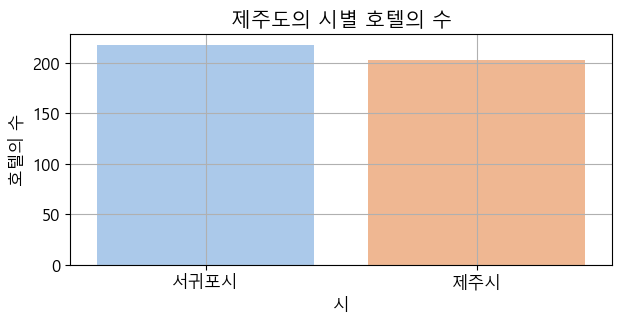

In [126]:
# 시 별 호텔의 수 그래프로 시각화

# 1) 그래프 전역 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (7,3)
plt.rcParams['axes.unicode_minus'] = False

# 2) 그래프 그리기
sb.barplot(data=si_df, x=si_df.index, y='count', palette='pastel')

plt.title("제주도의 시별 호텔의 수")
plt.xlabel("시")
plt.ylabel("호텔의 수")
plt.grid()
plt.show()
plt.close()

분석결과 : 제주도에는 제주시보다 서귀포시에 호텔의 수가 많다.

* 제주도 숙박 구분 그래프 (파이그래프)

In [127]:
# 구분 컬럼 = 파이그래프의 labels
labels = list(hotel_df['구분'].unique())
labels

['관광호텔업', '한국전통호텔업', '가족호텔업', '호스텔업', '소형호텔업', '휴양콘도미니엄업']

In [128]:
# 파이그래프의 데이터
data = list(hotel_df['구분'].value_counts())

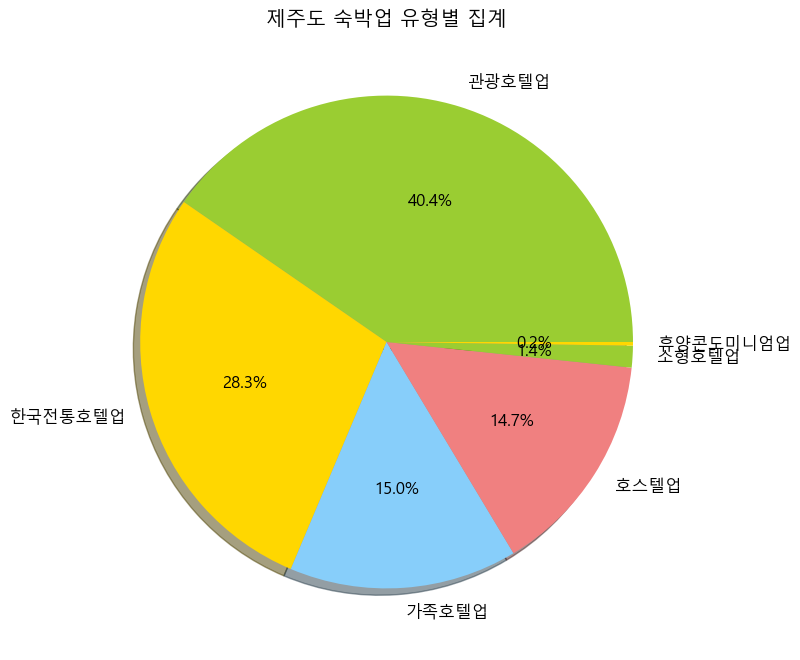

In [129]:
# 1) 그래프 전역 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['axes.unicode_minus'] = False

# 2) 파이그래프로 시각화

#데이터
data = list(hotel_df['구분'].value_counts())

# 각 데이터별 레이블
labels = list(hotel_df['구분'].unique())

# 각 데이터별 색상
colors = ['yellowgreen','gold','lightskyblue','lightcoral']

# 각 데이터별 확대비율
# explode = (0,0.0,0,0)

plt.figure()
plt.title("제주도 숙박업 유형별 집계")
plt.pie(data, labels=labels, colors=colors,
        autopct='%0.1f%%', startangle=0, shadow=True)
# plt.savefig('pie chart.png')
plt.show()
plt.close()

분석결과 : 제주도 숙박업을 유형별로 구분했을 때 관광호텔업 > 한국전통호텔업 > 가족호텔업 순으로 많았다.

* 제주도 숙소 유형별 객실수 분포 (hue파라미터 사용한 막대그래프)

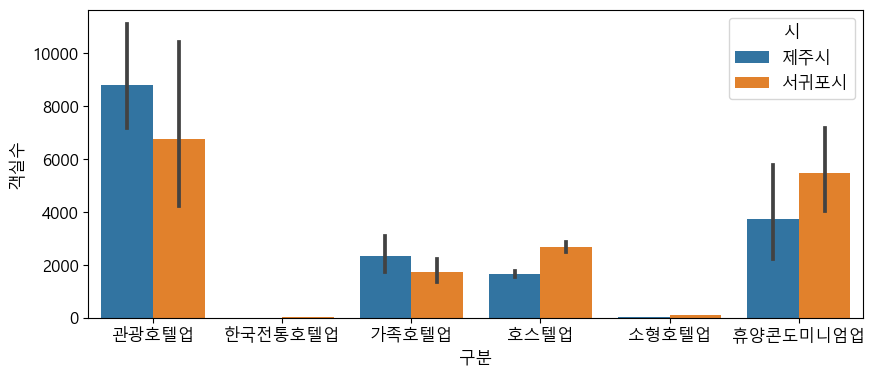

In [130]:
# 1) 그래프 전역 설정
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["axes.unicode_minus"] = False

# 2) hue파라미터 사용하여 범주에 따라 구분 시각화 
sb.barplot(data=hotel_df, x='구분', y='객실수', hue='시', estimator='sum')
plt.show()
plt.close()

분석결과 : 제주도의 제주시가 서귀포시보다 관광호텔업 유형이 많았지만, 휴양콘도미니엄업과 호스텔업의 경우 서귀포시가 제주시보다 많았다. <br> 

<span style= 'color : blue' >4. 데이터 합치기</span>

* 4-1. 야놀자 호텔 데이터
    * Selenium을 이용한 수집

In [ ]:
url='https://www.yanolja.com/hotel/r-900584?advert=AREA&topAdvertiseMore=1&region=900584'

In [ ]:
# 필요한 패키지 설치
import numpy as np
import pandas as pd
import chromedriver_autoinstaller
import selenium
from selenium.webdriver.common.by import  By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver import Chrome
import bs4
from selenium.webdriver.common.keys import Keys
import time

In [ ]:
# 객체 생성
driver=Chrome()
driver.get('https://www.yanolja.com/hotel/r-900584?advert=AREA&topAdvertiseMore=1&region=900584')

In [ ]:
# 날짜는 수작업으로 설정 : 2023.07.20~2023.07.26 / 성인 2명 

In [ ]:
# 스크롤내리기 작업
while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
    time.sleep(0.5)
    before_height = int(driver.execute_script("return document.body.scrollHeight"))
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
    time.sleep(0.5)
    height = int(driver.execute_script("return document.body.scrollHeight"))
    if before_height==height:
        break

In [ ]:
# html 불러오기
A=bs4.BeautifulSoup(driver.page_source)
data1=list(map(lambda x:x.attrs["title"],A.select(".PlaceListItemBanner_container__ARsIm.banner-unit a")))
data2=list(map(lambda x:x.attrs["title"],A.select('.PlaceListItemText_container__fUIgA.text-unit a')))

In [ ]:
# 데이터 추출
y_hotellist=data1+data2
y_hotellist

In [ ]:
# 공공데이터와 합치기
# 1) 공공데이터 호텔명 리스트
data = list(hotel_df['상호명'])
len(data)

In [ ]:
# 2) 만약 공공데이터 호텔리스트에 야놀자호텔 크롤링 데이터가 없다면 추가 
for y in y_hotellist:
    if y not in data:
        data.append(y)
len((data)) 

In [ ]:
# 3) data => 공공데이터 + 야놀자 크롤링 호텔리스트
data

* 4-2. 마이리얼트립 호텔
    * Selenium을 이용한 수집

In [ ]:
url='https://accommodation.myrealtrip.com/union/products?checkIn=2023-07-20&checkOut=2023-07-26&adultCount=2&childCount=0&childAges=&infantCount=0&infantAges=&regionId=&keyword=%EC%A0%9C%EC%A3%BC%EB%8F%84&roomCount=1'

In [ ]:
# 필요한 패키지 설치 (야놀자 참조)
# 객체 생성
driver=Chrome()

In [ ]:
# get 요청
driver.get(url)

In [ ]:
# 스크롤 내리기
point=WebDriverWait(driver,1).until(lambda x:x.find_element(By.CSS_SELECTOR,"body"))

In [ ]:
result=[]
while True:
    for i in range(2):
        point.send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    M=bs4.BeautifulSoup(driver.page_source).select('.css-1xdhyk6 .e12a3oa10.css-121peml')
    Now=list(set(sum([result,M],[])))
    print(Now)
    if Now==result:
        break
    result=Now

In [ ]:
m_hotellist = []
for r in result:
    m_hotellist.append(r.text)
len(set(m_hotellist)) 

In [ ]:
# 마이리얼트립 호텔리스트 m_hotellist를 공공데이터+야놀자데이터에 append
for m in m_hotellist:
    if m not in data:
        data.append(m)

data

* 4-3. 통합 데이터

In [ ]:
# 총 호텔 데이터 리스트 = data
data

# 공백과 띄어쓰기 제거한 최종 데이터 = pre_data
pre_data=[]
for d in data:
    pre_data.append(d.strip().replace(" ",''))
pre_data

<span style = 'color : blue '> 5.OPEN API 이용한 pre_data의 주소 도출</span>

* 5-1. open api 이용한 주소 도출

In [ ]:
# OPEN API 이용한 pre_data의 주소 도출

url = "https://dapi.kakao.com/v2/local/search/keyword.json?"
key = "19111005ad4c10663591e0a55b344ba5"
query = pre_data

Data = []
for q in pre_data: 
    r = requests.get(url, params={'query':q}, headers={"Authorization": "KakaoAK 19111005ad4c10663591e0a55b344ba5"})
    js = simplejson.JSONEncoder().encode(r.json())
    result = r.json()
    Data.append(result['documents'])
Data

In [ ]:
# place_name과 address_name만 추출한 데이터 = processing_Data  
processing_Data=list(map(lambda x: (x[0]["place_name"],x[0]['address_name']) if x else None,Data))

In [ ]:
# processing_Data를 데이터프레임으로 만든후 컬럼 재정의 & '숙박'xlsx으로 저장
totalData = pd.DataFrame(data=[x for x in processing_Data if x]).rename(columns={0:"place_name",1:"address_name"}).to_excel("숙박2.xlsx")
totalData

* 5-2. 데이터 전처리

In [ ]:
# svg 파일의 행정구역 g id 확인
path_id = ['구좌', '조천', '동제주', '중제주', '서제주', 
        '애월', '성산', '한림', '표선', '남원', '한경', '안덕', 
        '동서귀', '중서귀', '서서귀', '대정']

# g_id에 따라 district_list 구분
행정구역 = {'구좌':'구좌',
  '조천':'조천', 
  '화북': '동제주','봉개':'동제주', '회천':'동제주','용강':'동제주',
  '오라':'중제주','아라':'중제주','오등':'중제주','화북':'중제주','이도':'중제주','건입':'중제주','삼도':'중제주','용담':'중제주','일도':'중제주', 
  '도두':'서제주','이호':'서제주','외도':'서제주','내도':'서제주','도평':'서제주','노형':'서제주','연동':'서제주','강정':'서제주','도순':'서제주',
  '영남':'서제주','월평':'서제주','해안':'서제주', '노형':'서제주',
  '애월' :'애월',
  '성산':'성산',
  '한림':'한림',
  '표선':'표선',
  '남원':'남원',
  '한경':'한경',
  '안덕':'안덕',
  '영천':'동서귀','동흥':'동서귀','효돈':'동서귀','송산':'동서귀','신효':'동서귀','하효':'동서귀','서귀':'동서귀','보목':'동서귀','동홍':'동서귀',
  '대천':'중서귀','대륜':'중서귀','서홍':'중서귀', '강정':'중서귀','법환':'중서귀','서호':'중서귀','호근':'중서귀',
  '여래':'서서귀','중문':'서서귀','회수':'서서귀', '하원':'서서귀','대포':'서서귀', '색달':'서서귀', '하예':'서서귀', '상예':'서서귀',  
  '대정':'대정'}


In [5]:
import pandas as pd
import numpy as np
from IPython.display import SVG,Image
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import os


#### 최종 호텔 데이터 가져오기

* 데이터 전처리

In [ ]:
data=data[data["지번주소"].str.find("제주특별")!=-1]
# data.drop(columns="Unnamed: 0",inplace=True)
data["행정구역"]=np.nan

In [ ]:
data

In [ ]:
행정구역 = {'구좌':'구좌',
  '조천':'조천', 
  '화북': '동제주','봉개':'동제주', '회천':'동제주','용강':'동제주',
  '오라':'중제주','아라':'중제주','오등':'중제주','화북':'중제주','이도':'중제주','건입':'중제주','삼도':'중제주','용담':'중제주','일도':'중제주', 
  '도두':'서제주','이호':'서제주','외도':'서제주','내도':'서제주','도평':'서제주','노형':'서제주','연동':'서제주','강정':'서제주','도순':'서제주',
  '영남':'서제주','월평':'서제주','해안':'서제주', '노형':'서제주',
  '애월' :'애월',
  '성산':'성산',
  '한림':'한림',
  '표선':'표선',
  '남원':'남원',
  '한경':'한경',
  '안덕':'안덕',
  '영천':'동서귀','동흥':'동서귀','효돈':'동서귀','송산':'동서귀','신효':'동서귀','하효':'동서귀','서귀':'동서귀','보목':'동서귀','동홍':'동서귀',
  '대천':'중서귀','대륜':'중서귀','서홍':'중서귀', '강정':'중서귀','법환':'중서귀','서호':'중서귀','호근':'중서귀',
  '여래':'서서귀','중문':'서서귀','회수':'서서귀', '하원':'서서귀','대포':'서서귀', '색달':'서서귀', '하예':'서서귀', '상예':'서서귀',  
  '대정':'대정'}

#### 데이터의 주소와 svg파일의 id값 불일치 -> 데이터 재배치(?)

In [ ]:
 # 지번주소를 도로명 주소로 바꾸는 함수.
def trans(x):
    for i in 행정구역.keys():
        try:
            if i in x:
                return 행정구역[i]
        except:
            break

In [ ]:
# 지번주소
error=[]
data["행정구역"]=data["지번주소"].apply(lambda x:trans(x))

In [ ]:
# 도로명주소
data.loc[data["행정구역"].isna(),"행정구역"]=data[data["행정구역"].isna()].apply(lambda x:trans(x))

#### 시각화
* 색상리스트 준비

In [ ]:
colors = ['#fffae6', '#ffeb99', '#ffdb4d', '#ffcc00', '#e6b800','#cca300','#997a00','#4d3d00']

* histogram 을 이용한 구간 설정

In [ ]:
# 행정구역이 index , 행정구역별 count값이 column
color_rule=pd.merge(pd.DataFrame(set(행정구역.values())).set_index(0),pd.DataFrame(data["행정구역"].value_counts()),
                    how="left",left_index=True,right_index=True).fillna(0)

In [ ]:
color_rule

In [ ]:
# 히스토그램 구간 
x,y=np.histogram(color_rule["count"].values,bins=8)

In [ ]:
y

In [ ]:
# 구간 별 색상 
dc=dict(zip(y[:-1],colors))

In [ ]:
dc

In [ ]:
# 행정구역 별 구간은 어디인지 
for name in color_rule.index:
    for i in y[:-1]:
        if color_rule.loc[name]['count']>=i:
            color_rule.loc[name,'color_id']=i

In [ ]:
color_rule

In [ ]:
# svg 파일 열기
with open("./제주map.svg","r",encoding="utf-8") as f:
    jeju_map=f.readlines()

In [ ]:
# svg파일의 색상을 color_rule의 color_id값으로 대체하기
for name in color_rule.index:
    idx=[]
    for i in range(len(jeju_map)):
        if name in jeju_map[i]:
            idx.append(i)
    for j in map(lambda x:x+1,idx):
        jeju_map[j]=jeju_map[j].replace("#eeeeee",dc[color_rule.loc[name]["color_id"]])

In [ ]:
# 
with open("호텔시각화.html","w") as f:
    for line in jeju_map:
         f.write(line)

![행정구역별_호텔_밀집도](./호텔_시각화.png)

* 분석결과 
제주시, 애월읍, 동서귀포시에 호텔의 밀집도가 높았다. 

<span style = 'color:blue'> 7. 관광지SVG시각화와 호텔SVG시각화 비교 </span>

![관광지분포](./관광지_시각화.png)
<b>*[행정구역별 관광지 분포현황]*<b>
![호텔의분포](./호텔_시각화.png)
<b>*[행정구역별 호텔의 분포 현황]*<b>

* 관광지SVG시각화와 호텔SVG시각화 비교

`'동서귀포시'`에 호텔과 관광지가 밀집되어 있음을 알 수 있다. <br> 
또한 `제주도 지역의 중심부`에 관광지와 호텔이 많이 분포되어 있는데, 왜 이런 현상이 나타났을까? <br>
-> 가장 큰 이유는 `한라산` 때문이라고 할 수 있다. 제주도 중심에는 한라산이 위치해 있고 한라산을 찾는 관광객들이 가까운 숙소에 묵고, 숙소와 가까운 관광지를 찾는다고 볼 수 있을 것 같다. <br> 


<span style = 'color:blue'> 8. 음식점SVG시각화와 호텔SVG시각화 비교 </span>

![음식점_시각화](./음식점_시각화.png)
<b>*[행정구역별_음식점_분포도]*<b>
![호텔_시각화](./호텔_시각화.png)
<b>*[행정구역별_호텔_분포도]*<b>


* 음식점SVG시각화와 호텔SVG시각화 비교

`'동서귀포시'`에 호텔과 음식점이 밀집되어 있음을 알 수 있다. <br> 
또한 `제주도 지역의 중심부`에 음식점과 호텔이 많이 분포되어 있는데, 왜 이런 현상이 나타났을까? <br>
-> 가장 큰 이유는 앞서 말한 이유와 동일하다. 바로 `한라산` 때문이라고 할 수 있다. 제주도 중심에는 한라산이 위치해 있고 한라산을 찾는 관광객들이 가까운 숙소에 묵고, 숙소와 가까운 관광지를 찾는다고 볼 수 있을 것 같다. <br>
<br>
하지만 관광지 시각화와 다른 점이 있다. <br>
제주 조천읍, 구좌읍에는 호텔의 분포가 적은 반면, 음식점의 분포도가 높음을 알 수 있다. 왜 이런 현상이 나타났을까? <br>
-> 앞서 본 관광지시각화 그림을 보면 '조천읍','구좌읍'에 관광지 분포도가 높았다. 따라서 관광산업이 주인 제주도에서는 `관광객`을 타켓층으로 음식점이 많이 분포되어 있음을 알 수 있다.

### <span style= 'color : blue' > *4단계 : 상관관계 분석* </span>

#### <b>*1. 소비자의 `만족도`를 `평점`이라고 가정*</b> <br>
-<b>*만족도의 요인 (제주공항과의 거리, 관광지와의 거리) 라고 할 때*<b><br>
|단계|가설|
|----|---|
|`step1`| 호텔의 평점데이터 가져오기|<br>
|`step2`| 호텔의 평점과 제주공항과의 거리와의 관계 : 제주공항과 거리가 가까울 수록 평점이 높은가?|<br>
|`step3`| 호텔의 평점과 관광지와의 거리 상관관계: 관광지와 거리가 가까울 수록 평점이 높은가? |<br>

1. 작업준비
* 필요한 패키지 설치

In [2]:
import pandas as pd
from pandas import DataFrame, melt, read_excel
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import folium
from os import path, mkdir
import base64

import bs4
import requests
import json
import simplejson

import chromedriver_autoinstaller
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from bs4 import BeautifulSoup

<span style= 'color : blue' > 2. 호텔의 평점 데이터 </span>

* 데이터 크롤링

* 데이터 읽어오기

* 데이터 정제

* 분석결과

<span style= 'color : blue'> 3. 호텔의 평점과 제주공항과의 거리와의 관계 : 제주공항과 거리가 가까울 수록 평점이 높은가? </span>

* 카카오맵을 이용한 소요시간 측정 함수

In [ ]:
def KAKAO(START,FINISH):

    import bs4
    import selenium
    import chromedriver_autoinstaller
    from selenium.webdriver.common.by import By
    from selenium.webdriver.support.ui import WebDriverWait
    from selenium.webdriver import Chrome
    import time
    from selenium.webdriver.common.keys import Keys
    import datetime as dt

    driver=Chrome()
    time.sleep(3)
    driver.get('https://map.kakao.com/')
    try:
        need_remove=WebDriverWait(driver,3).until(lambda x: x.find_element(By.CSS_SELECTOR,".coach_layer.coach_layer_type1 .view_coach"))
        need_remove.click()
    except:
        pass
    path_page=WebDriverWait(driver,3).until(lambda x: x.find_element(By.ID,"search.tab2"))
    path_page.click()
    try:  
        need_remove2=WebDriverWait(driver,3).until(lambda x: x.find_element(By.CSS_SELECTOR,".layer_body .desc_coach"))
        need_remove2.click()
    except:
        pass

    start=WebDriverWait(driver,3).until(lambda x: x.find_element(By.CSS_SELECTOR,".waypointWindow>input"))
    start.send_keys(Keys.ENTER)
    start.click()
    #_______________________________________________________________#
    start2=WebDriverWait(driver,3).until(lambda x: x.find_element(By.CSS_SELECTOR,".WaypointInput>input"))
    start2.send_keys(START) #출발지 입력
    start2.send_keys(Keys.DOWN)
    start2.send_keys(Keys.ENTER)
    time.sleep(1)

    finish=WebDriverWait(driver,3).until(lambda x: x.find_element(By.ID,"info.route.waypointSuggest.input1"))
    finish.send_keys("메가스터디IT 강남점") #도착지 입력
    finish.send_keys(Keys.DOWN)
    finish.send_keys(Keys.ENTER)
    time.sleep(1)

    texi=WebDriverWait(driver,3).until(lambda x: x.find_element(By.ID,"cartab"))
    texi.click()
    print("준비완료")
    #________________________<반복>________________________________________#
    final={}
    for finishs in FINISH:
        try:
            refinish1=WebDriverWait(driver,3).until(lambda x: x.find_element(By.CSS_SELECTOR,"#info .WaypointBoxView.dest .waypointWindow .valueBox"))
            refinish1.click()
            refinish2=WebDriverWait(driver,3).until(lambda x: x.find_element(By.ID,"info.route.waypointSuggest.input1"))
            refinish2.clear()
            refinish2.send_keys(finishs)
            refinish2.send_keys(Keys.ENTER)
            time.sleep(1)
            texi.click()
            time.sleep(1)
            soup=bs4.BeautifulSoup(driver.page_source)
            datas=soup.select(".contents")[0]
            info=dict.fromkeys(['time','distance','toll','taxi','oil'])
            for key in info:
                info[key]=datas.select(f".{key}")[0].text        
            final[finishs]=info
            time.sleep(1)
        except:
            continue
    return final

* 공항에서 호텔까지의 거리 측정

        : 호텔 리스트 불러오기

In [12]:
df = pd.read_excel('./숙박3-1.xlsx')
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Unnamed: 0.1,place_name,address_name
0,0,하니크라운호텔,제주특별자치도 제주시 이도일동 1315
1,1,제주썬호텔&카지노,제주특별자치도 제주시 연동 291-30
2,2,제주로얄호텔,제주특별자치도 제주시 연동 272-34
3,3,제주팔레스호텔,제주특별자치도 제주시 삼도2동 1192-18
4,4,펄호텔 제주,제주특별자치도 제주시 연동 277-1
...,...,...,...
789,812,바이더힐펜션,제주특별자치도 제주시 애월읍 유수암리 2049-1
790,813,제주담스파빌,제주특별자치도 제주시 한림읍 금능리 1803-2
791,814,소서제주 745,제주특별자치도 제주시 애월읍 유수암리 719-9
792,815,브라운캐빈,제주특별자치도 제주시 애월읍 상가리 54-2


        : 공항(출발지) ~ 호텔(도착지) 소요시간 측정

In [ ]:
hotel_distance = KAKAO('제주공항',df['address_name'])
hotel_distance

* 저장

In [ ]:
with open("공항_호텔_거리","w",encoding="utf-8") as f:
    f.write(str(hotel_distance))

* 확인

In [9]:
df2 = pd.read_excel("./카카오맵(공항_숙박_거리).xlsx")
df2

,Unnamed: 0,index,time,distance,toll,taxi,oil
0,0,제주특별자치도 제주시 이도일동 1315,6시간 37분,535.5km,"통행료 약 16,700원","택시비 약 557,900원","주유비 약 64,000원"
1,1,제주특별자치도 제주시 연동 291-30,7분,3.0km,통행료 약 0원,"택시비 약 4,200원",주유비 약 438원
2,2,제주특별자치도 제주시 연동 272-34,10분,3.3km,통행료 약 0원,"택시비 약 4,800원",주유비 약 482원
3,3,제주특별자치도 제주시 삼도2동 1192-18,10분,4.3km,통행료 약 0원,"택시비 약 5,200원",주유비 약 628원
4,4,제주특별자치도 제주시 연동 277-1,12분,4.0km,통행료 약 0원,"택시비 약 5,500원",주유비 약 584원
...,...,...,...,...,...,...,...
324,324,제주특별자치도 서귀포시 법환동 745-1,52분,48.0km,통행료 약 0원,"택시비 약 39,900원","주유비 약 7,009원"
325,325,제주특별자치도 서귀포시 안덕면 서광리 산 24-15,36분,31.4km,통행료 약 0원,"택시비 약 26,700원","주유비 약 4,585원"
326,326,제주특별자치도 제주시 연동 284-8,8분,3.6km,통행료 약 0원,"택시비 약 4,500원",주유비 약 526원
327,327,제주특별자치도 제주시 건입동 1443-2,12분,4.8km,통행료 약 0원,"택시비 약 5,500원",주유비 약 701원


In [10]:
df2.drop('Unnamed: 0',axis=1, inplace=True)

In [13]:
# 호텔명 컬럼 추가
df2['호텔명'] = df['place_name']

In [14]:
# 확인
df2

,index,time,distance,toll,taxi,oil,호텔명
0,제주특별자치도 제주시 이도일동 1315,6시간 37분,535.5km,"통행료 약 16,700원","택시비 약 557,900원","주유비 약 64,000원",하니크라운호텔
1,제주특별자치도 제주시 연동 291-30,7분,3.0km,통행료 약 0원,"택시비 약 4,200원",주유비 약 438원,제주썬호텔&카지노
2,제주특별자치도 제주시 연동 272-34,10분,3.3km,통행료 약 0원,"택시비 약 4,800원",주유비 약 482원,제주로얄호텔
3,제주특별자치도 제주시 삼도2동 1192-18,10분,4.3km,통행료 약 0원,"택시비 약 5,200원",주유비 약 628원,제주팔레스호텔
4,제주특별자치도 제주시 연동 277-1,12분,4.0km,통행료 약 0원,"택시비 약 5,500원",주유비 약 584원,펄호텔 제주
...,...,...,...,...,...,...,...
324,제주특별자치도 서귀포시 법환동 745-1,52분,48.0km,통행료 약 0원,"택시비 약 39,900원","주유비 약 7,009원",호텔컬리넌 제주
325,제주특별자치도 서귀포시 안덕면 서광리 산 24-15,36분,31.4km,통행료 약 0원,"택시비 약 26,700원","주유비 약 4,585원",호텔앨리스&트렁크
326,제주특별자치도 제주시 연동 284-8,8분,3.6km,통행료 약 0원,"택시비 약 4,500원",주유비 약 526원,함덕비치스테이제주
327,제주특별자치도 제주시 건입동 1443-2,12분,4.8km,통행료 약 0원,"택시비 약 5,500원",주유비 약 701원,제주신화월드 서머셋


In [15]:
# 행정구역 컬럼 추가하기 
df2=df2[df2["index"].str.find("제주특별")!=-1]
# data.drop(columns="Unnamed: 0",inplace=True)
df2["행정구역"]=np.nan

C:\Users\hanjieun_2\AppData\Local\Temp\ipykernel_28212\4050735251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["행정구역"]=np.nan


In [17]:
df2

,index,time,distance,toll,taxi,oil,호텔명,행정구역
0,제주특별자치도 제주시 이도일동 1315,6시간 37분,535.5km,"통행료 약 16,700원","택시비 약 557,900원","주유비 약 64,000원",하니크라운호텔,NaN
1,제주특별자치도 제주시 연동 291-30,7분,3.0km,통행료 약 0원,"택시비 약 4,200원",주유비 약 438원,제주썬호텔&카지노,NaN
2,제주특별자치도 제주시 연동 272-34,10분,3.3km,통행료 약 0원,"택시비 약 4,800원",주유비 약 482원,제주로얄호텔,NaN
3,제주특별자치도 제주시 삼도2동 1192-18,10분,4.3km,통행료 약 0원,"택시비 약 5,200원",주유비 약 628원,제주팔레스호텔,NaN
4,제주특별자치도 제주시 연동 277-1,12분,4.0km,통행료 약 0원,"택시비 약 5,500원",주유비 약 584원,펄호텔 제주,NaN
...,...,...,...,...,...,...,...,...
324,제주특별자치도 서귀포시 법환동 745-1,52분,48.0km,통행료 약 0원,"택시비 약 39,900원","주유비 약 7,009원",호텔컬리넌 제주,NaN
325,제주특별자치도 서귀포시 안덕면 서광리 산 24-15,36분,31.4km,통행료 약 0원,"택시비 약 26,700원","주유비 약 4,585원",호텔앨리스&트렁크,NaN
326,제주특별자치도 제주시 연동 284-8,8분,3.6km,통행료 약 0원,"택시비 약 4,500원",주유비 약 526원,함덕비치스테이제주,NaN
327,제주특별자치도 제주시 건입동 1443-2,12분,4.8km,통행료 약 0원,"택시비 약 5,500원",주유비 약 701원,제주신화월드 서머셋,NaN


In [18]:
행정구역 = {'구좌':'구좌',
  '조천':'조천', 
  '화북': '동제주','봉개':'동제주', '회천':'동제주','용강':'동제주',
  '오라':'중제주','아라':'중제주','오등':'중제주','화북':'중제주','이도':'중제주','건입':'중제주','삼도':'중제주','용담':'중제주','일도':'중제주', 
  '도두':'서제주','이호':'서제주','외도':'서제주','내도':'서제주','도평':'서제주','노형':'서제주','연동':'서제주','강정':'서제주','도순':'서제주',
  '영남':'서제주','월평':'서제주','해안':'서제주', '노형':'서제주',
  '애월' :'애월',
  '성산':'성산',
  '한림':'한림',
  '표선':'표선',
  '남원':'남원',
  '한경':'한경',
  '안덕':'안덕',
  '영천':'동서귀','동흥':'동서귀','효돈':'동서귀','송산':'동서귀','신효':'동서귀','하효':'동서귀','서귀':'동서귀','보목':'동서귀','동홍':'동서귀',
  '대천':'중서귀','대륜':'중서귀','서홍':'중서귀', '강정':'중서귀','법환':'중서귀','서호':'중서귀','호근':'중서귀',
  '여래':'서서귀','중문':'서서귀','회수':'서서귀', '하원':'서서귀','대포':'서서귀', '색달':'서서귀', '하예':'서서귀', '상예':'서서귀',  
  '대정':'대정'}

In [19]:
 # 지번주소를 도로명 주소로 바꾸는 함수.
def trans(x):
    for i in 행정구역.keys():
        try:
            if i in x:
                return 행정구역[i]
        except:
            break

In [22]:
# 지번주소
error=[]
df2["행정구역"]=df2["index"].apply(lambda x:trans(x))

C:\Users\hanjieun_2\AppData\Local\Temp\ipykernel_28212\2445740625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["행정구역"]=df2["index"].apply(lambda x:trans(x))


In [23]:
# 도로명주소
df2.loc[df2["행정구역"].isna(),"행정구역"]=df2[df2["행정구역"].isna()].apply(lambda x:trans(x))

In [24]:
df2

,index,time,distance,toll,taxi,oil,호텔명,행정구역
0,제주특별자치도 제주시 이도일동 1315,6시간 37분,535.5km,"통행료 약 16,700원","택시비 약 557,900원","주유비 약 64,000원",하니크라운호텔,중제주
1,제주특별자치도 제주시 연동 291-30,7분,3.0km,통행료 약 0원,"택시비 약 4,200원",주유비 약 438원,제주썬호텔&카지노,서제주
2,제주특별자치도 제주시 연동 272-34,10분,3.3km,통행료 약 0원,"택시비 약 4,800원",주유비 약 482원,제주로얄호텔,서제주
3,제주특별자치도 제주시 삼도2동 1192-18,10분,4.3km,통행료 약 0원,"택시비 약 5,200원",주유비 약 628원,제주팔레스호텔,중제주
4,제주특별자치도 제주시 연동 277-1,12분,4.0km,통행료 약 0원,"택시비 약 5,500원",주유비 약 584원,펄호텔 제주,서제주
...,...,...,...,...,...,...,...,...
324,제주특별자치도 서귀포시 법환동 745-1,52분,48.0km,통행료 약 0원,"택시비 약 39,900원","주유비 약 7,009원",호텔컬리넌 제주,동서귀
325,제주특별자치도 서귀포시 안덕면 서광리 산 24-15,36분,31.4km,통행료 약 0원,"택시비 약 26,700원","주유비 약 4,585원",호텔앨리스&트렁크,안덕
326,제주특별자치도 제주시 연동 284-8,8분,3.6km,통행료 약 0원,"택시비 약 4,500원",주유비 약 526원,함덕비치스테이제주,서제주
327,제주특별자치도 제주시 건입동 1443-2,12분,4.8km,통행료 약 0원,"택시비 약 5,500원",주유비 약 701원,제주신화월드 서머셋,중제주


In [26]:
# 행정구역별 value.count()
df3= pd.DataFrame(df2['행정구역'].value_counts())
df3

,count
행정구역,
동서귀,111
서제주,55
중제주,37
애월,30
성산,22
한림,14
안덕,10
중서귀,9
남원,5


In [8]:
# 평점데이터와 df3데이터 프레임 매칭 시키기


<span style='color:blue'> 4. 호텔의 평점과 관광지와의 거리 상관관계(행정구역 별): 관광지와 거리가 가까울 수록 평점이 높은가? </span>

* 카카오맵을 이용한 소요시간 측정 함수 (앞 참조)

In [ ]:
# KAKAO함수

* 호텔(출발지)과 관광지(도착지)까지의 거리 측정

* 호텔 평점 데이터

In [ ]:
# 1번 참조

* 

*********************

<span style = 'font-size:40px'><b> 3. 분석결과</span>

1. 호텔의 평점(행정구역 별)과 제주공항과의 거리의 상관관계 

호텔의 평점과 제주공항 사이의 상관관계를 확인하기 어려웠다.
다만 특정 거리 마다 모든 점수대(1,2,3대의 호텔은 데이터가 너무 적어 의미가 없을 수준)임을 미루어볼때,
제주공항 근처에 호텔이 밀집해있다 점차 흩어져 바다쪽(오션뷰)로 밀집도가 높아짐을 확인할 수 있었다.

2. 호텔의 평점(행정구역 별)과 관광지,음식점과의 상관관계

큰 상관관걔를 확인하지 못했다.
같은 행정구역에 위치한 음식점의 수, 관광지의 수, 관광지의 평군평점 모두 낮은 상관관계를 보여주었다.
하지만 추가로 조사한 관광지의 수, 음식점 수와 숙박업의 수에서의 상관관계가 있어보인다.

**************

<span style = 'font-size:40px'><b> 4. 결론 <b></span>

숙박업의 소비자 만족도(평점)과 외부적 요인(관광지,음식점)사이의 관련성이 적음으로 보여진다.
하지만 숙박업의 수는 각각의 외부적인 요인의 수와 관련성이 있어보임을 알수 있었다.